In [56]:
import networkx as nx
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
from networkx.algorithms import community

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
df = pd.read_csv("/content/drive/MyDrive/data/facebook_combined.txt",sep=' ', header=None, names=['fromNodeId', 'toNodeId']);
df = df.iloc[:2000]

df['max_mobility'] = np.random.choice([0, 0.5, 1], size=len(df))

def generate_random_mobility(max_mobility):
    return np.random.uniform(0, max_mobility)

df['mobility'] = df.apply(lambda row: generate_random_mobility(row['max_mobility']), axis=1)

In [133]:
df

,fromNodeId,toNodeId,max_mobility,mobility
0,0,1,0.0,0.000000
1,0,2,0.0,0.000000
2,0,3,0.5,0.241740
3,0,4,0.0,0.000000
4,0,5,1.0,0.557092
...,...,...,...,...
1995,107,1222,0.5,0.044199
1996,107,1223,0.5,0.030536
1997,107,1224,0.5,0.195677
1998,107,1225,0.0,0.000000


In [126]:
def module_degree_base_division(g,cns,ism):
  return

In [129]:
def initialize(G):
    detected_community = []
    current_community = []
    nodes = G.nodes()
    for i in nodes:
        current_community.append({'node': i, 'mobility': G.nodes[i]['mobility']})
    detected_community.append(current_community)
    return current_community, detected_community

def compute_community_structure(graph, node, community):
    """
    Tính toán cấu trúc cộng đồng cho một nút trong một cộng đồng.

    Tham số:
    - graph: Đồ thị chứa các kết nối giữa các nút.
    - node: Nút cần tính toán cấu trúc.
    - community: Danh sách các nút trong cộng đồng.

    Trả về:
    - CNS: Giá trị của cấu trúc cộng đồng.
    """
    # Tính CSi,j cho nút node trong cộng đồng community
    CSi_j = 0
    for neighbor in graph.neighbors(node):
        if neighbor in community:
            CSi_j += 1

    # Tính CNS theo một công thức
    CNS = 0.5 * CSi_j + 0.5 * (len(set(graph.neighbors(node))) / len(community))

    return CNS

def compute_node_similarity(graph, node_i, node_j):
    """
    Tính toán độ tương đồng giữa hai nút trong đồ thị sử dụng công thức đã được cung cấp.

    Tham số:
    - graph: Đồ thị chứa các kết nối giữa các nút.
    - node_i: Nút thứ nhất.
    - node_j: Nút thứ hai.

    Trả về:
    - Node Similarity giữa hai nút.
    """

    mobility_i = float(graph.nodes[node_i]['mobility'])
    mobility_j = float(graph.nodes[node_j]['mobility'])

    # Tính Node Similarity theo công thức đã cung cấp
    node_similarity = mobility_i / np.sqrt(mobility_i * mobility_j) if mobility_i * mobility_j != 0 else 0
    return node_similarity

def compute_inter_structure_measure(graph, node_i, node_j):
    """
    Tính toán Interest Similarity giữa hai người dùng i và j từ đồ thị.

    Tham số:
    - graph: Đồ thị chứa các nút và các kết nối giữa chúng.
    - node_i: Nút thứ nhất.
    - node_j: Nút thứ hai.

    Trả về:
    - Interest Similarity giữa người dùng i và j.
    """
    # Lấy vector quan tâm của người dùng i từ thuộc tính của nút
    interest_vector_i = graph.nodes[node_i]['mobility']  # Thay 'interest_vector' bằng tên thực tế của thuộc tính

    # Lấy vector quan tâm của người dùng j từ thuộc tính của nút
    interest_vector_j = graph.nodes[node_j]['mobility']  # Thay 'interest_vector' bằng tên thực tế của thuộc tính

    # Lấy giá trị pi_i (có thể là giá trị liên quan đến người dùng i) từ thuộc tính của nút
    pi_i = graph.nodes[node_i]['mobility']

    sum_k_i_j = sum([k_i_j for k_i_j in interest_vector_i])
    sqrt_pi_i = math.sqrt(pi_i)
    sum_k_interest_i = math.sqrt(sum([k_interest_i**2 for k_interest_i in interest_vector_i]))
    sum_k_interest_j = math.sqrt(sum([k_interest_j**2 for k_interest_j in interest_vector_j]))

    interest_similarity = sum_k_i_j / (sqrt_pi_i * sum_k_interest_i * sum_k_interest_j) if sqrt_pi_i != 0 else 0

    return interest_similarity
    return 0.5

def dynamic_community_detections(graph, communities, eta):
  flag = 0
  while flag != 1:
    for node_i in graph.nodes():
        for community in communities:
            CNSi_z = 0
            ISMi_js_sum = 0

            for node_j in community:
                CSi_z = compute_community_structure(graph, node_i, community)
                NSi_j = compute_node_similarity(graph, node_i, node_j)
                ISMi_j = compute_inter_structure_measure(graph, node_i, node_j)
                ISMi_js_sum += NSi_j

            CNSi_z = eta * CSi_z + (1 - eta) * (ISMi_js_sum / len(community))
            print(f"CNS_{community}: {CNSi_z}")
  flag, communitiess = module_degree_base_division(graph, CNSi_z, ISMi_js_sum)
  return communitiess

In [130]:
def compute_degree_centrality(graph):
    """
    Tính độ đo Degree Centrality của từng node trong đồ thị.

    Parameters:
    - graph: Đồ thị chứa các kết nối giữa các nút.

    Returns:
    - degree_centrality: Dictionary chứa độ đo Degree Centrality của từng node.
    """
    degree_centrality = nx.degree_centrality(graph)
    return degree_centrality

def compute_betweenness_centrality(graph):
    """
    Tính độ đo Betweenness Centrality của từng node trong đồ thị.

    Parameters:
    - graph: Đồ thị chứa các kết nối giữa các nút.

    Returns:
    - betweenness_centrality: Dictionary chứa giá trị của độ đo Betweenness Centrality cho từng node.
    """
    betweenness_centrality = nx.betweenness_centrality(graph)
    return betweenness_centrality

def compute_closeness_centrality(graph):
    """
    Tính độ đo Closeness Centrality của từng node trong đồ thị.

    Parameters:
    - graph: Đồ thị chứa các kết nối giữa các nút.

    Returns:
    - closeness_centrality: Dictionary chứa giá trị của độ đo Closeness Centrality cho từng node.
    """
    closeness_centrality = nx.closeness_centrality(graph)
    return closeness_centrality

def visualize_graph_degree(graph):
    """
    Trực quan hóa đồ thị với màu sắc dựa trên độ đo Centrality.

    Parameters:
    - graph: Đồ thị chứa các kết nối giữa các nút.
    - centrality_values: Dictionary chứa giá trị của độ đo Centrality cho từng node.
    """
    fig, ax = plt.subplots(1,1,figsize=(25,25), dpi=50)
    pos = nx.spring_layout(graph, k = 0.15, iterations = 20)
    nodes = nx.draw_networkx_nodes(graph,pos,node_size=80,cmap=plt.cm.plasma,node_color=list(nx.degree_centrality(graph).values()),
                                   nodelist=nx.degree_centrality(graph).keys())
    edges = nx.draw_networkx_edges(graph,pos,alpha=0.2,width=0.5)
    plt.title('degree_centrality')
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

def visualize_graph_betweenness(graph):
    """
    Trực quan hóa đồ thị với màu sắc dựa trên độ đo Centrality.

    Parameters:
    - graph: Đồ thị chứa các kết nối giữa các nút.
    - centrality_values: Dictionary chứa giá trị của độ đo Centrality cho từng node.
    """
    fig, ax = plt.subplots(1,1,figsize=(25,25), dpi=50)
    pos = nx.spring_layout(graph, k = 0.15, iterations = 20)
    nodes = nx.draw_networkx_nodes(graph,pos,node_size=80,cmap=plt.cm.plasma,node_color=list(nx.degree_centrality(graph).values()),
                                   nodelist=nx.betweenness_centrality(graph).keys())
    edges = nx.draw_networkx_edges(graph,pos,alpha=0.2,width=0.5)
    plt.title('betweenness_centrality')
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

def dynamic_community_detection(graph, communities, eta):
  return 5

def visualize_graph_closeness(graph):
    """
    Trực quan hóa đồ thị với màu sắc dựa trên độ đo Centrality.

    Parameters:
    - graph: Đồ thị chứa các kết nối giữa các nút.
    - centrality_values: Dictionary chứa giá trị của độ đo Centrality cho từng node.
    """
    fig, ax = plt.subplots(1,1,figsize=(25,25), dpi=50)
    pos = nx.spring_layout(graph, k = 0.15, iterations = 20)
    nodes = nx.draw_networkx_nodes(graph,pos,node_size=80,cmap=plt.cm.plasma,node_color=list(nx.degree_centrality(graph).values()),
                                   nodelist=nx.closeness_centrality(graph).keys())
    edges = nx.draw_networkx_edges(graph,pos,alpha=0.2,width=0.5)
    plt.title('closeness_centrality')
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [134]:
G = nx.from_pandas_edgelist(df, source='fromNodeId', target='toNodeId', create_using=nx.DiGraph())
pos = nx.spring_layout(G, k = 0.15, iterations = 20)

In [135]:
stats=pd.DataFrame(G.nodes())
stats.columns=['Node']
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()

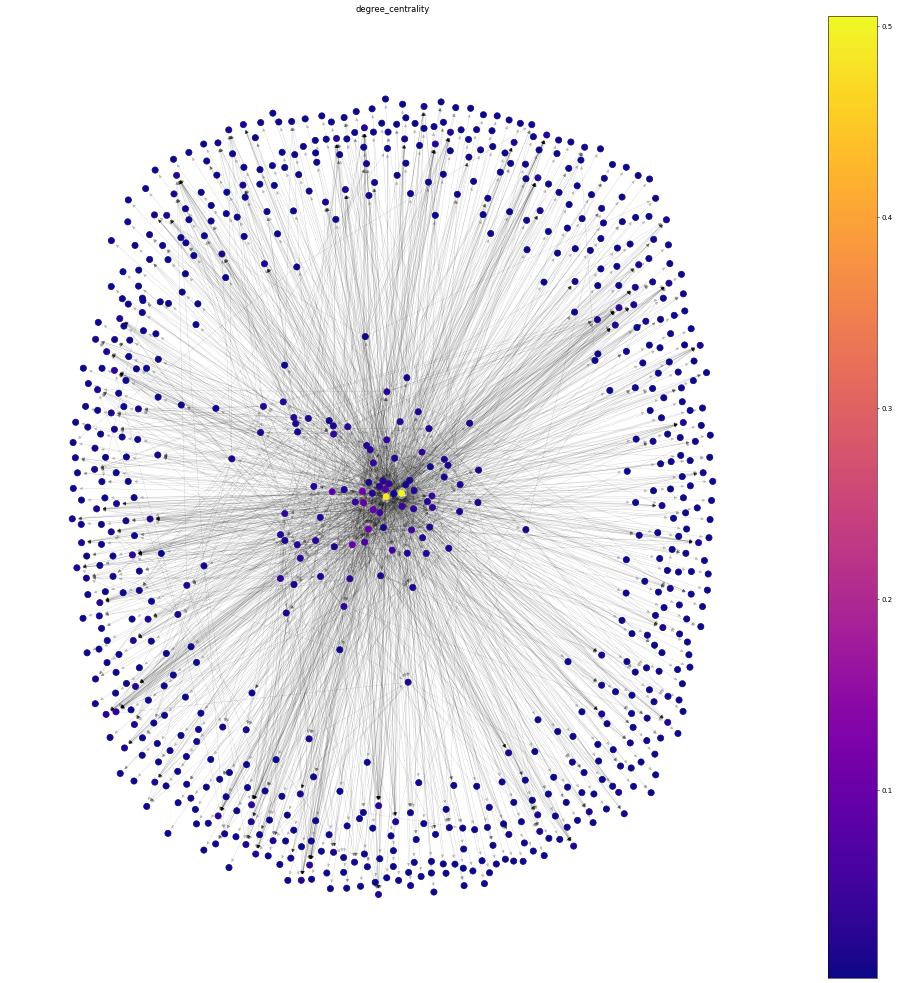

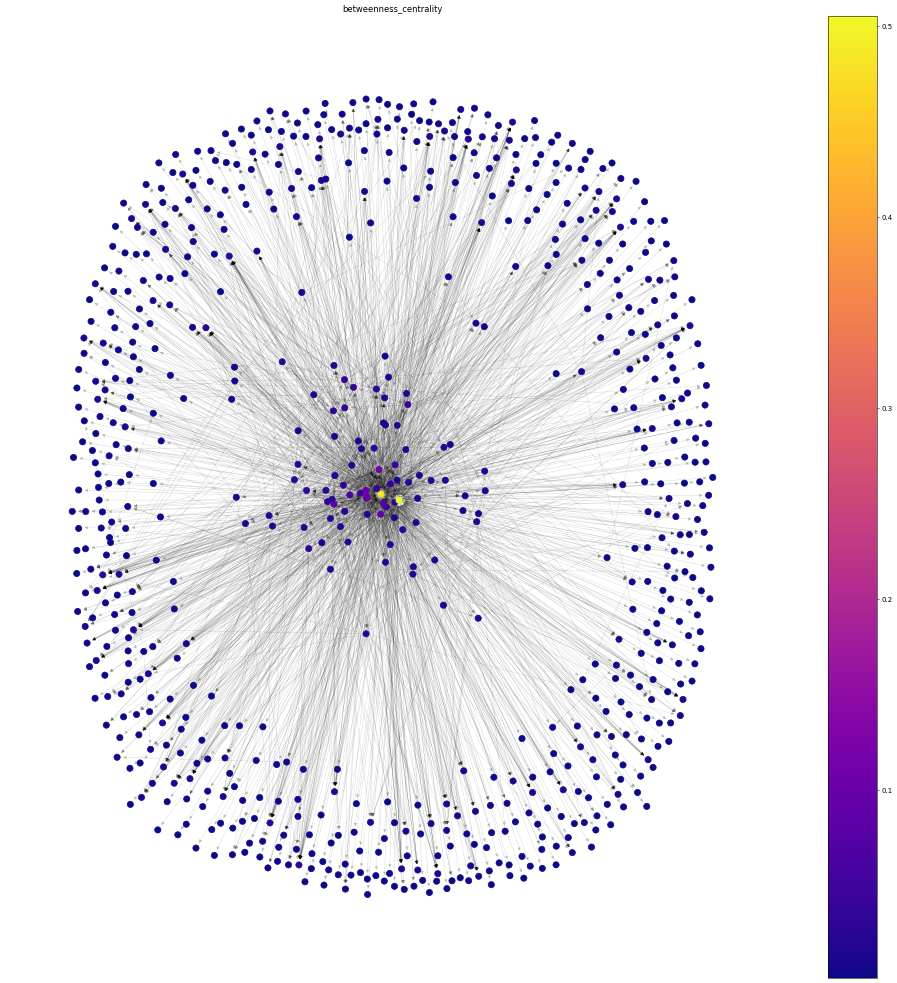

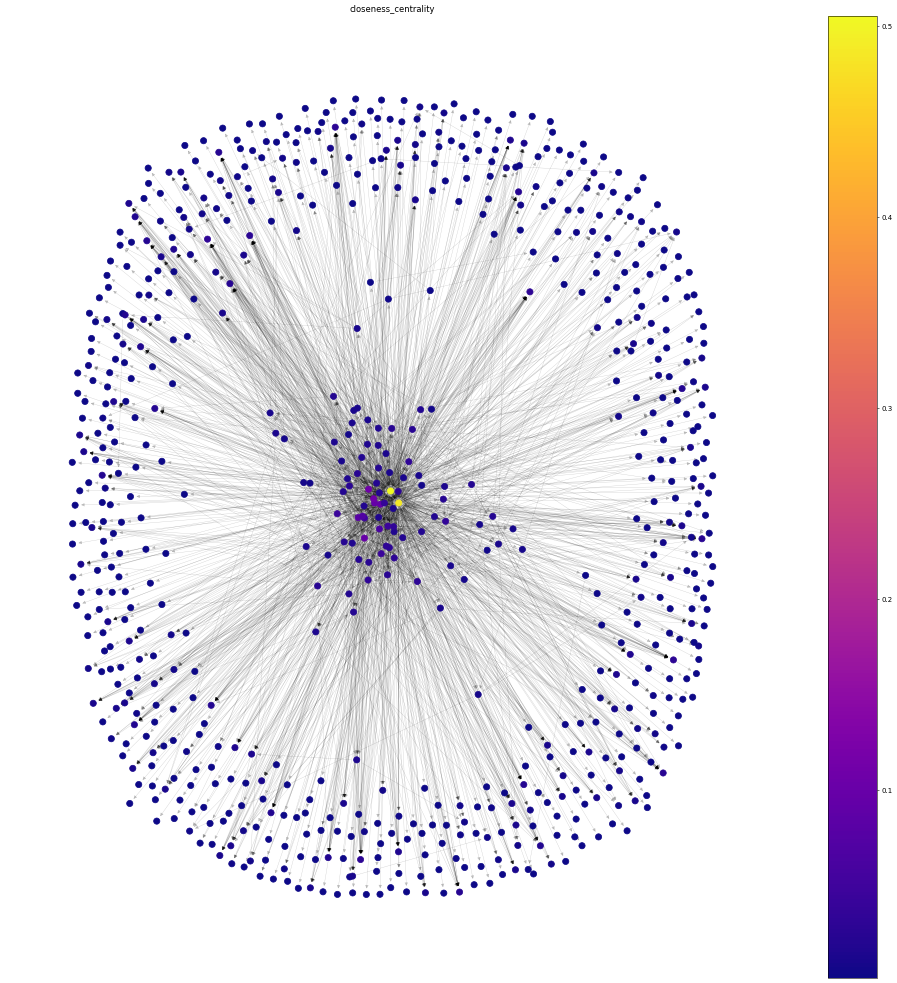

In [136]:
degree_centrality_values = compute_degree_centrality(G)
betweenness_centrality_values = compute_betweenness_centrality(G)
closeness_centrality_values = compute_closeness_centrality(G)

visualize_graph_degree(G)
visualize_graph_betweenness(G)
visualize_graph_closeness(G)

In [137]:
degree_list = [v for k, v in nx.degree_centrality(G).items()]
stats['Degree'] = degree_list
stats['Degree'] = round(stats['Degree'] * (n_nodes-1))
stats_Degree = stats[['Node','Degree']]
stats_Degree.sort_values(by='Degree', ascending=False).head(10)

,Node,Degree
107,107,360.0
0,0,347.0
56,56,78.0
67,67,76.0
25,25,69.0
26,26,68.0
21,21,65.0
9,9,57.0
98,98,49.0
40,40,44.0


In [138]:
counts = stats.groupby(['Degree']).size().reset_index(name='Feq')
counts['Probability'] = counts['Feq']/counts['Feq'].sum()
counts.head(10)

,Degree,Feq,Probability
0,1.0,405,0.568022
1,2.0,44,0.061711
2,3.0,45,0.063114
3,4.0,28,0.039271
4,5.0,16,0.022440
5,6.0,17,0.023843
6,7.0,20,0.028050
7,8.0,23,0.032258
8,9.0,18,0.025245
9,10.0,10,0.014025


In [139]:
betweenness_list = [v for k, v in nx.betweenness_centrality_subset(G, G.nodes, G.nodes).items()]
stats['betweenness'] = betweenness_list
stats_betweenness = stats[['Node','betweenness']]
stats_betweenness.sort_values(by='betweenness', ascending=False).head(10)

,Node,betweenness
107,107,712.500000
67,67,602.773413
56,56,349.507143
82,82,237.091270
98,98,196.780952
40,40,190.952381
88,88,149.483333
25,25,147.777778
21,21,86.198016
94,94,75.092857


In [140]:
counts = stats.groupby(['betweenness']).size().reset_index(name='Feq')
counts['Probability'] = counts['Feq']/counts['Feq'].sum()
counts.head(10)

,betweenness,Feq,Probability
0,0.000000,654,0.917251
1,0.166667,1,0.001403
2,0.500000,2,0.002805
3,0.650000,1,0.001403
4,0.666667,1,0.001403
5,1.000000,1,0.001403
6,1.500000,1,0.001403
7,1.517857,1,0.001403
8,2.152381,1,0.001403
9,3.000000,2,0.002805


In [141]:
closeness_list = [v for k, v in nx.closeness_centrality(G.reverse(),wf_improved=False).items()]
stats['closeness'] = closeness_list
stats_closeness = stats[['Node','closeness']]
stats_closeness.sort_values(by='closeness', ascending=False).head(10)

,Node,closeness
87,87,1.0
86,86,1.0
63,63,1.0
33,33,1.0
34,34,1.0
35,35,1.0
36,36,1.0
81,81,1.0
38,38,1.0
79,79,1.0


In [142]:
counts = stats.groupby(['closeness']).size().reset_index(name='Feq')
counts['Probability'] = counts['Feq']/counts['Feq'].sum()
counts.head(10)

,closeness,Feq,Probability
0,0.000000,613,0.859748
1,0.318421,1,0.001403
2,0.386905,1,0.001403
3,0.396040,1,0.001403
4,0.407692,1,0.001403
5,0.422983,1,0.001403
6,0.431193,1,0.001403
7,0.443902,2,0.002805
8,0.451613,1,0.001403
9,0.453202,1,0.001403


In [143]:
cluster = girvan_newman(G)
node_groups = next(cluster)
n = len(node_groups)
print("Number communities: "+str(n))
for i in range (n):
  print('Communities: ' + str(i) + ':' + str(node_groups[i]))

Number communities: 2
Communities: 0:{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 2

In [144]:
cluster = (community.greedy_modularity_communities(G))
for i, cong_dong in enumerate(cluster):
    print('Cộng đồng {}: {}'.format(i, list(cong_dong)))

Cộng đồng 0: [1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 34, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 107, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187,

In [145]:
G = nx.from_pandas_edgelist(df, source='fromNodeId', target='toNodeId', create_using=nx.DiGraph())
for node in G.nodes():
    mobility_values = df.loc[df['fromNodeId'] == node, 'mobility'].values
    if len(mobility_values) > 0:
        G.nodes[node]['mobility'] = mobility_values[0]
    else:
        # Xử lý trường hợp không có giá trị mobility cho nút này
        G.nodes[node]['mobility'] = 0.0

In [146]:
initial_communities = initialize(G)

In [147]:
print("Number communities: "+str(dynamic_community_detection(G, initial_communities, eta=0.5)))

Number communities: 5
